In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime , timedelta
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv(r"C:\Users\madhe\OneDrive\Desktop\Industrial Copper Modeling\Copper_Set.xlsx - Result 1.csv",low_memory=False)
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [13]:
# Converting the data types 

df["item_date_1"] = pd.to_datetime(df["item_date"], format='%Y%m%d', errors= "coerce").dt.date

df["delivery date_1"] = pd.to_datetime(df["delivery date"],format= "%Y%m%d" , errors="coerce").dt.date

df["quantity tons"] = pd.to_numeric(df["quantity tons"],errors="coerce")


In [14]:
df.dtypes

id                  object
item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
material_ref        object
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery date_1     object
dtype: object

In [15]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [16]:
# quantity tons and selling price have a negative values,so we need to replace the negative values.

df["quantity tons"] = df["quantity tons"].apply(lambda x: np.nan if x<=0 else x )

df["selling_price"] = df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [17]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816650e+05
mean,2.020459e+07,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918124e+03
std,4.551119e+03,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.318020e+05
min,1.995000e+07,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,1.000000e-01
25%,2.020093e+07,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [18]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'item_date_1',
       'delivery date_1'],
      dtype='object')

In [19]:
# Verify the number of unique values in each features

for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181668
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9789
item_date_1:250
delivery date_1:26


In [20]:
# material ref column removed the number in start with "00000" values

df["material_ref"] = df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x) 

In [21]:
df.isnull().sum()

id                      2
item_date               1
quantity tons           5
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           8
item_date_1             3
delivery date_1         3
dtype: int64

In [22]:
# material ref have more than 55% are Null Values and id have all are unique values, so we have drop the two columns.

df.drop(columns=["material_ref","id"],inplace=True)

In [23]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,20210401.0,1047.0,2021-04-01,2021-04-01


In [24]:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

## Handling the null values using mean(),median() and mode()

In [25]:
# Object Columns and Mode method used

df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)        # iloc[0] to get the first mode number
df["delivery date_1"].fillna(df["delivery date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"].fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"].fillna(df["delivery date"].mode().iloc[0],inplace=True)

In [26]:
# Numarical columns and Median method used
# The median is the middle value when the data is sorted in ascending order. If there is an even number of observations, the median is the average of the two middle numbers.

df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)   
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [27]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

### Encoding Method to convert catagorical column into numerical column 

In [28]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [29]:
df["status"] = df["status"].map({"Lost":0,"Won":1,"Draft":2,"To be approved":3,"Not lost for AM":4,"Wonderful":5,
                                 "Revised":6,"Offered":7,"Offerable":8})


In [30]:
df["status"].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [31]:
df["item type"] = OrdinalEncoder().fit_transform(df[["item type"]])

In [32]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [34]:
# Dataframe converted to csv file
df.to_csv("Industrial_Copper_Modeling_Proper.csv",index=False)

In [35]:
df1 = pd.read_csv(r"C:\Users\madhe\OneDrive\Desktop\Industrial Copper Modeling\Industrial_Copper_Modeling_Proper.csv")
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


### Handling the skewness using (Log Transfermation)
Log transformation is reduce skewness in a distribution and make it more symmetric.
primarily used to convert a skewed distribution to a normal distribution.

In [36]:
# detecting the skewed columns using plot

def plot(df1,column):

    # Distplot
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.distplot(df1[column])  
    plt.title("Distplot for"+" "+column) 

    # Histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df1,x=column,kde=True,bins=30,color="salmon")
    plt.title("Histogram plot for"+" "+column)

    # Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df1,x=column)
    plt.title("Box plot for"+" "+column)
    
    

In [37]:
skewed_columns = ["quantity tons","customer","country","status","item type",
                  "application","thickness","width","product_ref","selling_price"]


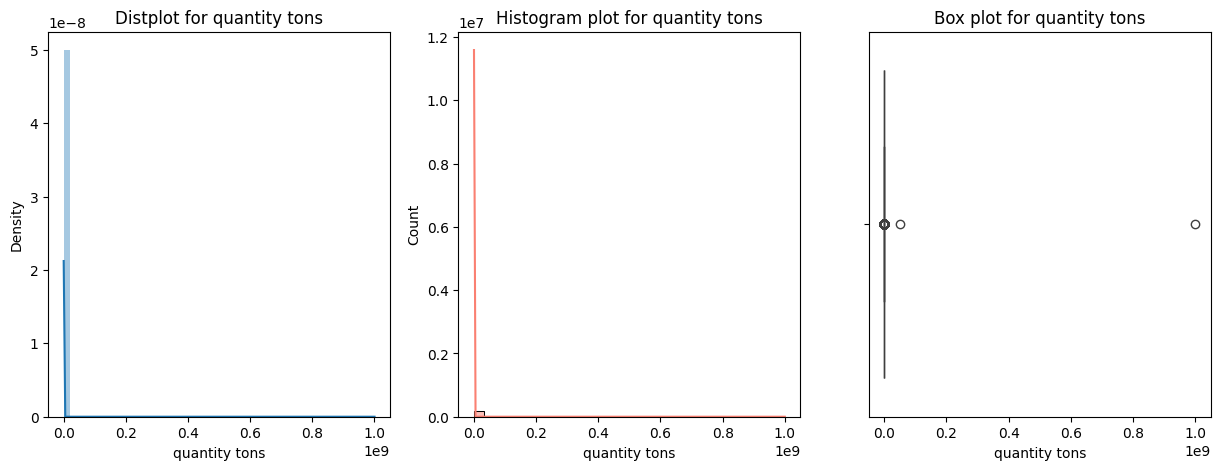

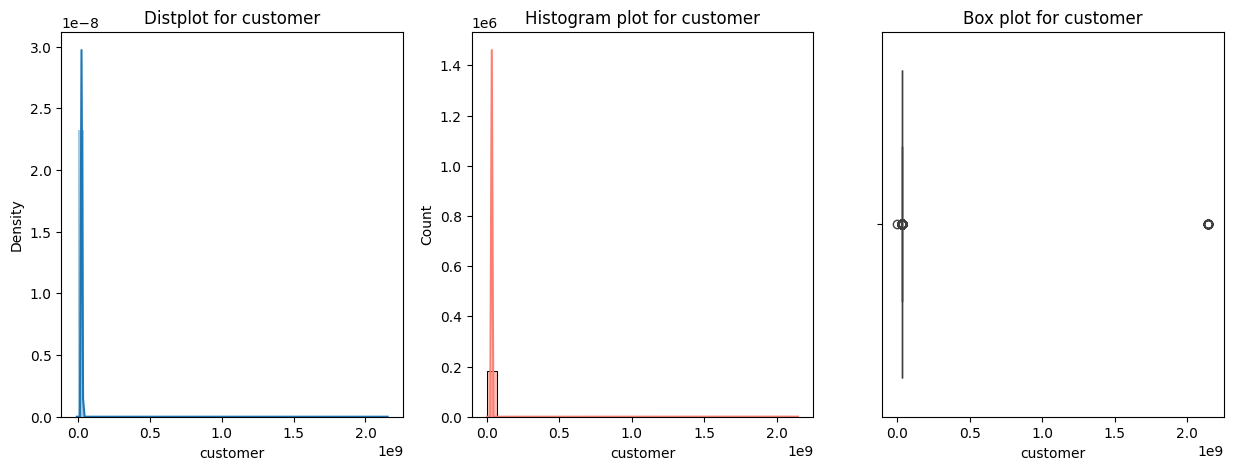

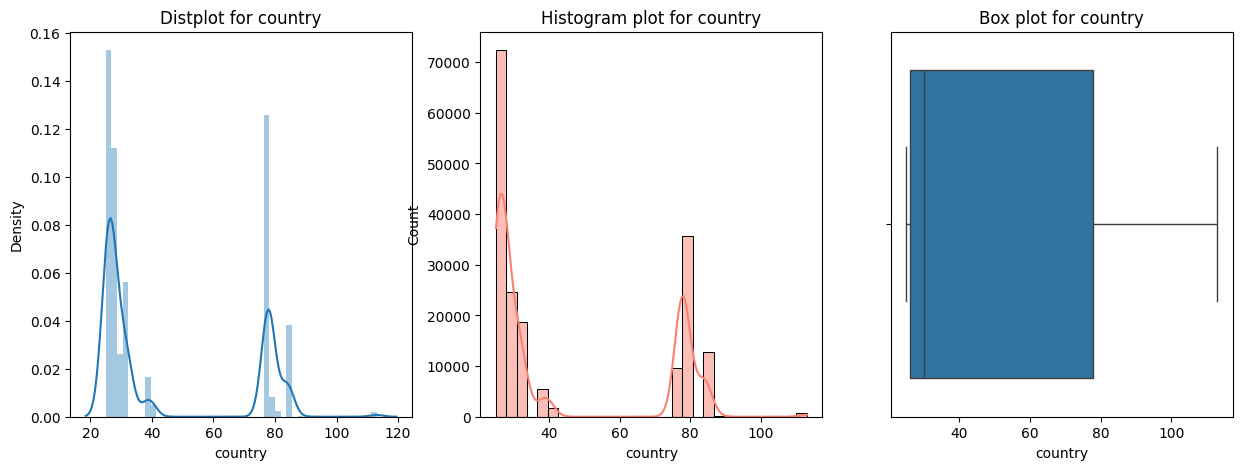

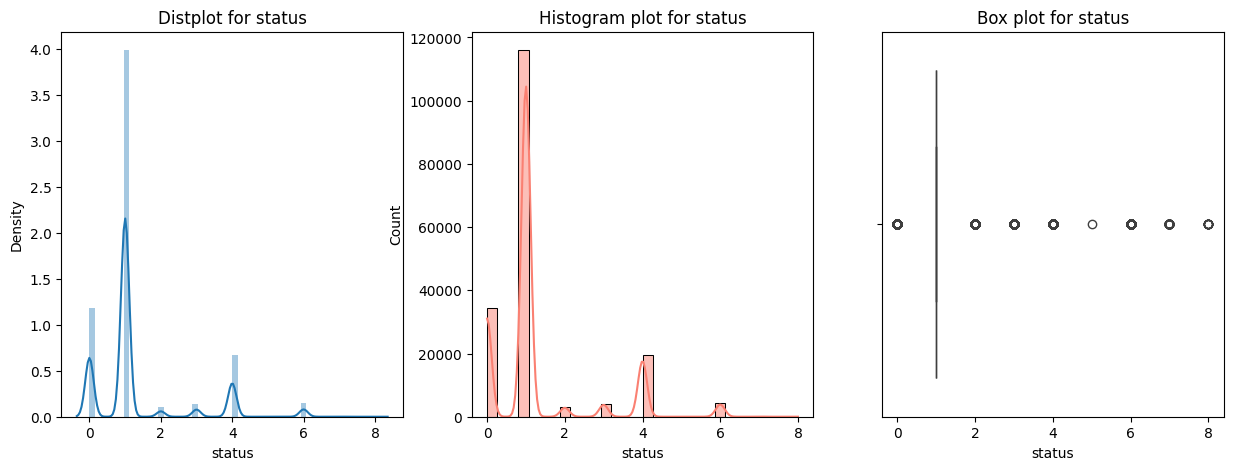

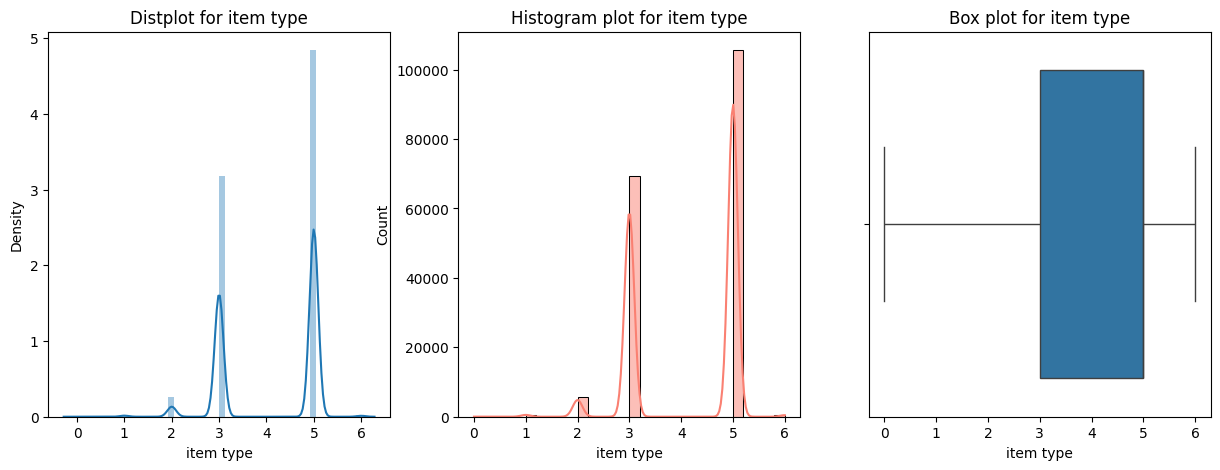

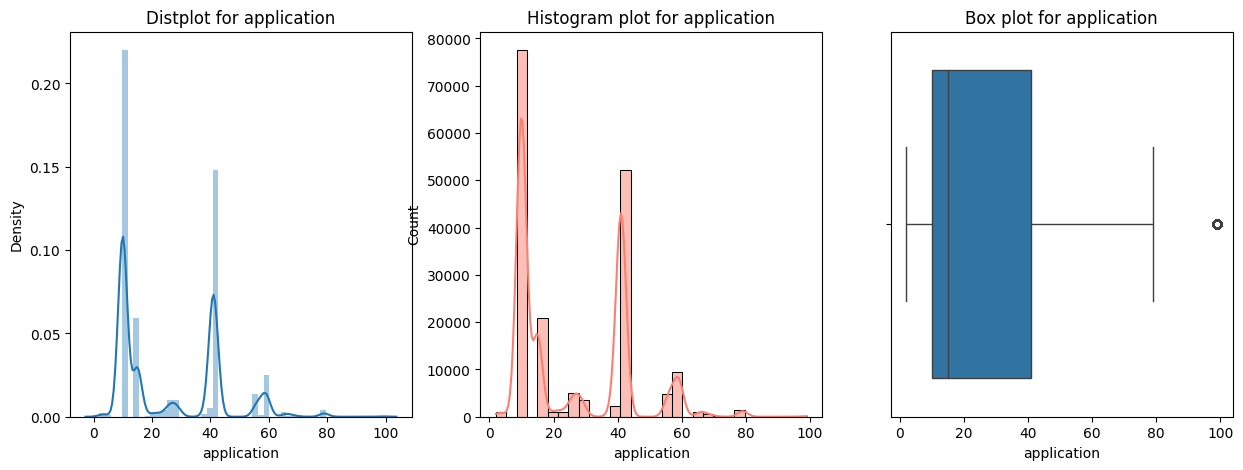

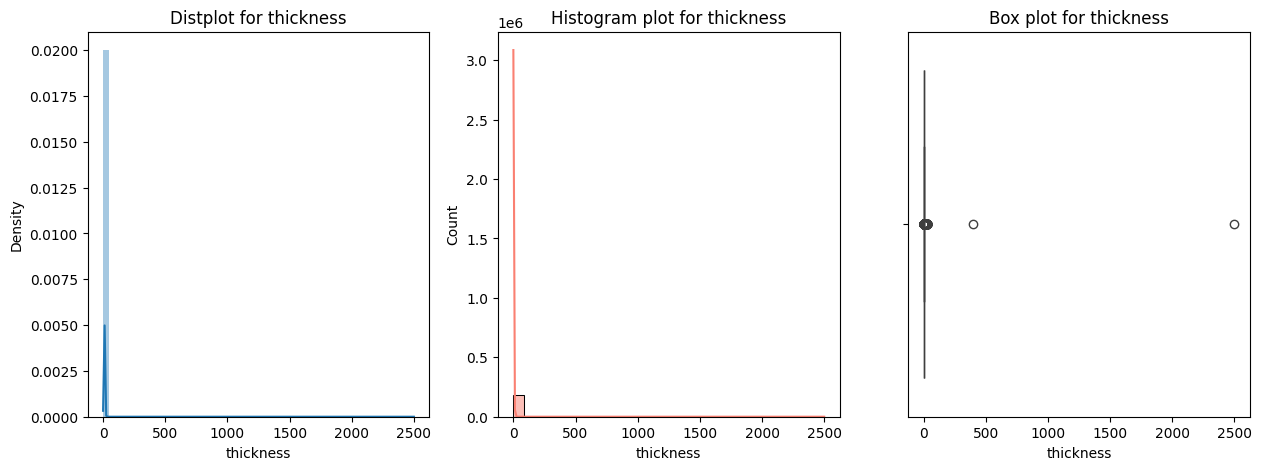

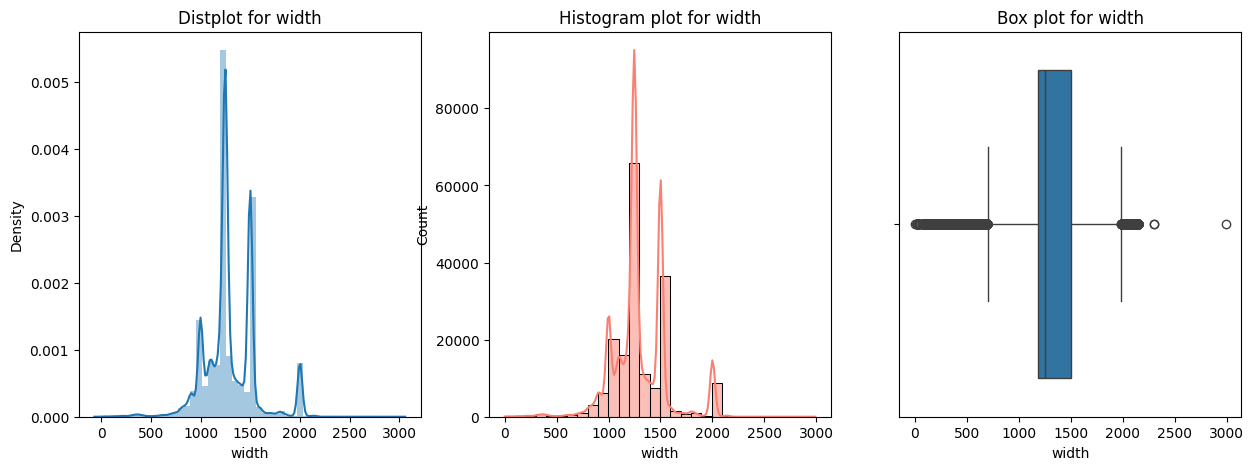

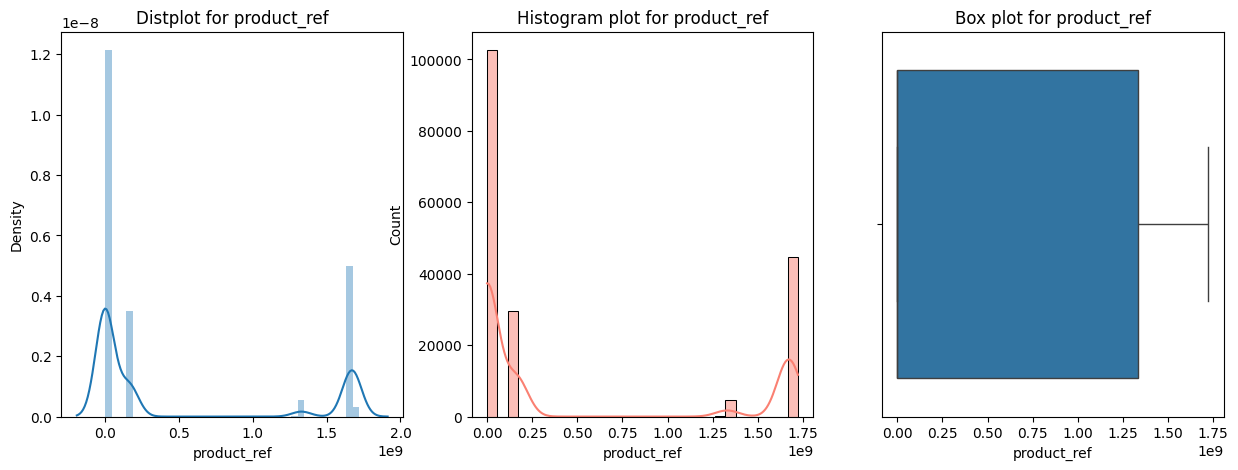

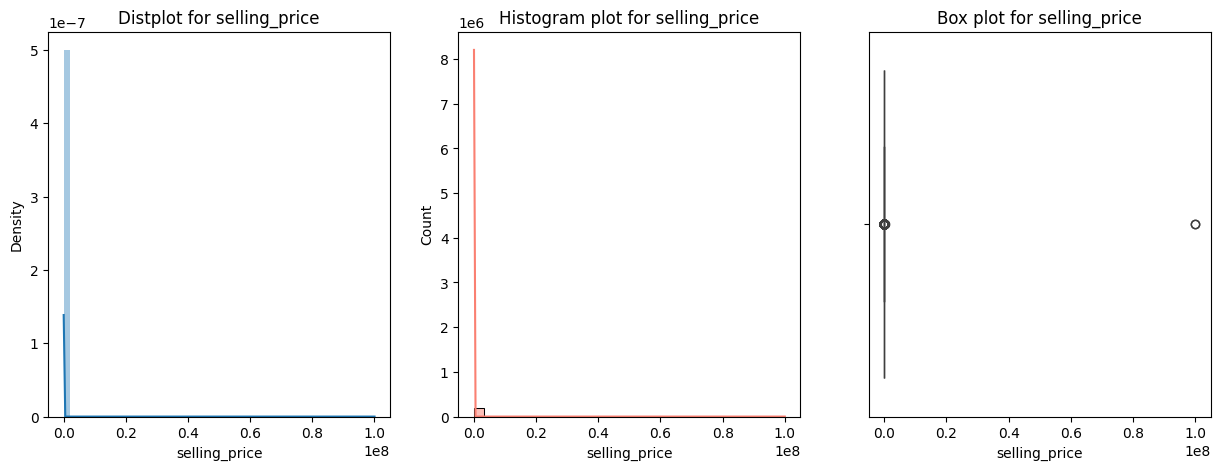

In [38]:
for i in skewed_columns:
    plot(df1,i)

In [39]:
# Skewed Columns

# 1. quantity tons
# 2. customer
# 3. thickness
# 4. selling price

In [40]:
df2 = df1.copy()

In [41]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery date_1'],
      dtype='object')

In [42]:
# skewed columns converted to log transfermation method
df2["quantity_tons_log"] = np.log(df2["quantity tons"])
df2["customer_log"] = np.log(df2["customer"])
df2["thickness_log"] = np.log(df2["thickness"])
df2["selling_price_log"] = np.log(df2["selling_price"])

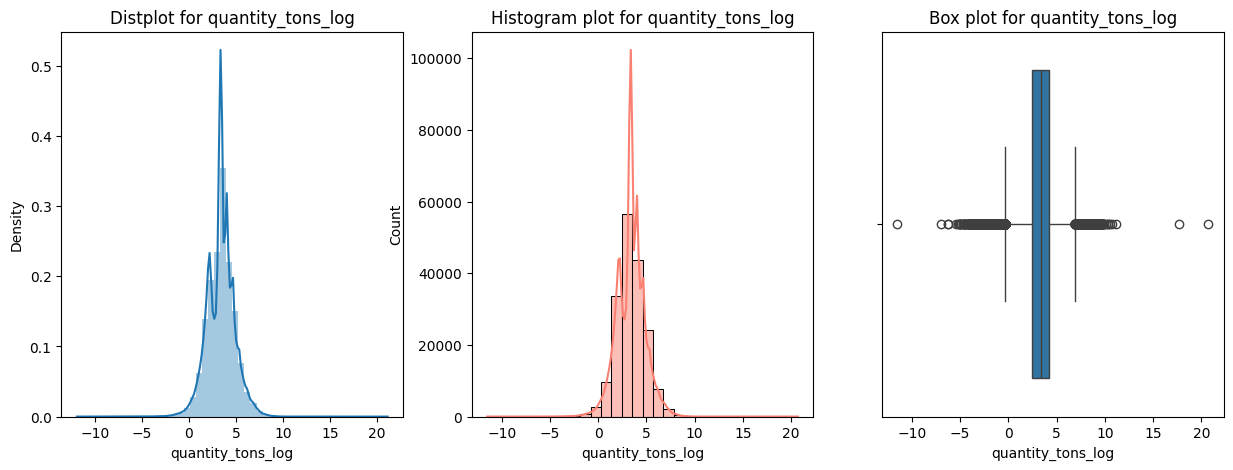

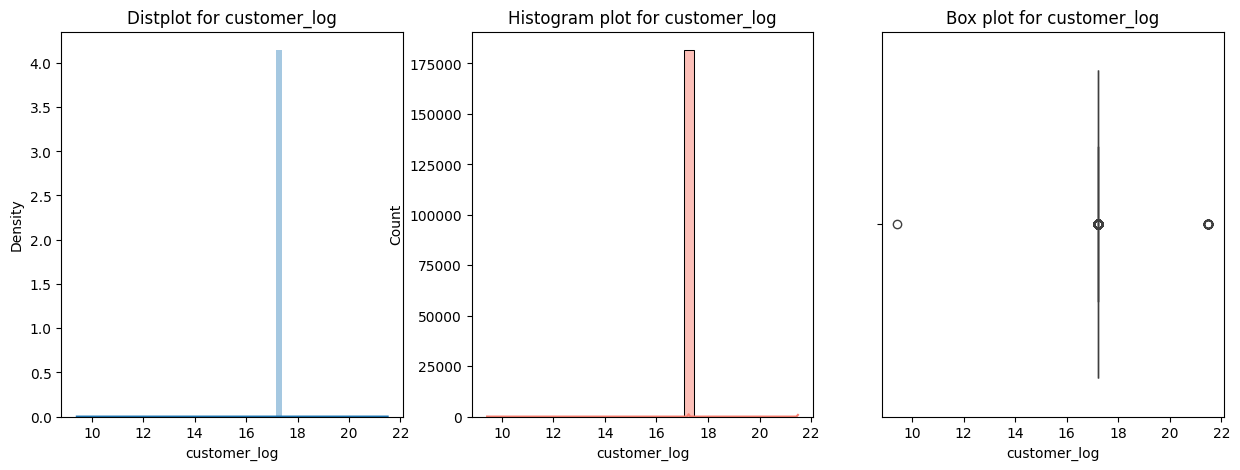

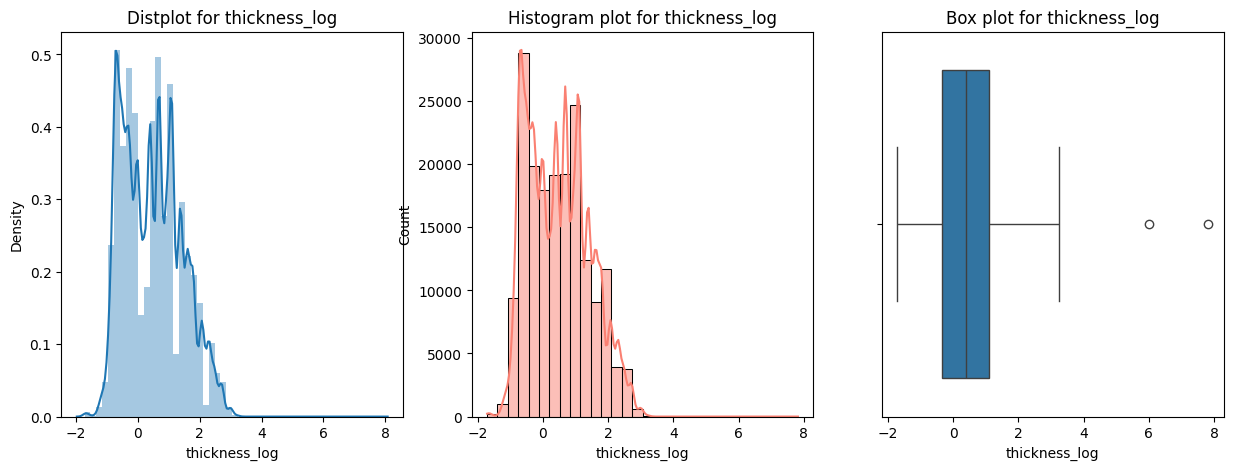

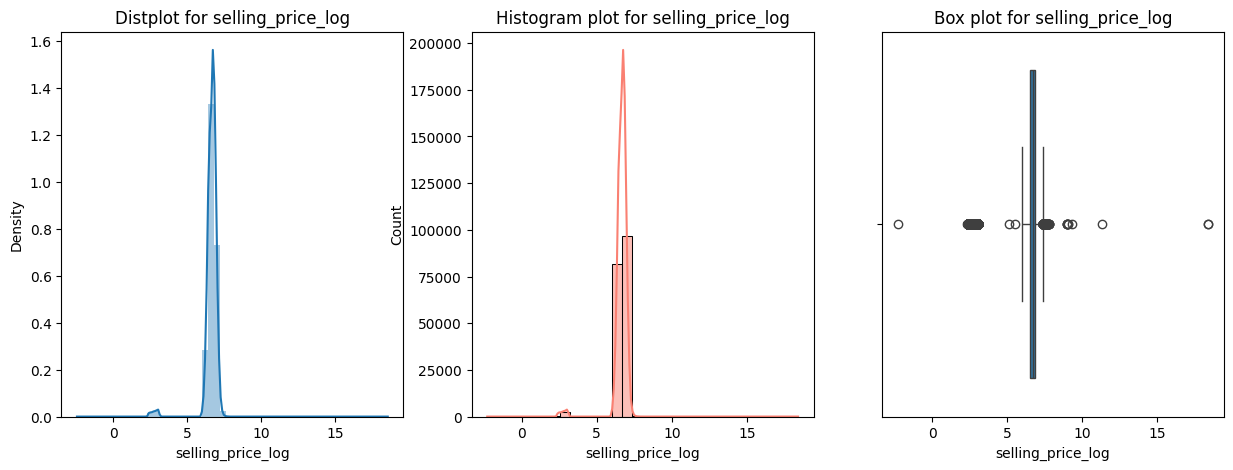

In [43]:
skewed_columns_2 = ["quantity_tons_log","customer_log","thickness_log","selling_price_log"]

for i in skewed_columns_2:
    plot(df2,i)

# Outliers Handling - Outlier Removal in Dataset using IQR -  Interquartile Range(IQR) Method 

An outlier is a single data point that goes far outside the average value of a group.

In [44]:
df3 = df2.copy()

In [45]:
df3.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [46]:
def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1

    upper_threshold = q3 + (1.5*iqr)
    lower_threshold = q1 - (1.5*iqr)

    df[column] = df[column].clip(lower_threshold,upper_threshold)

    

In [47]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [48]:
df3.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [49]:
outlier_columns = ["quantity_tons_log","customer_log","thickness_log","selling_price_log",
                   "width","application"]
for i in outlier_columns:
    outlier(df3,i)

In [50]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


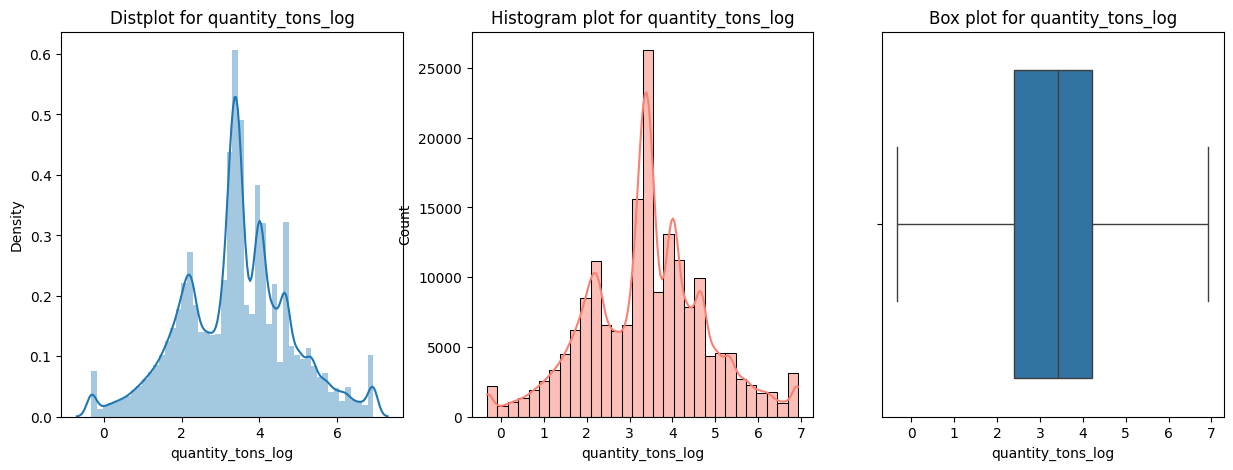

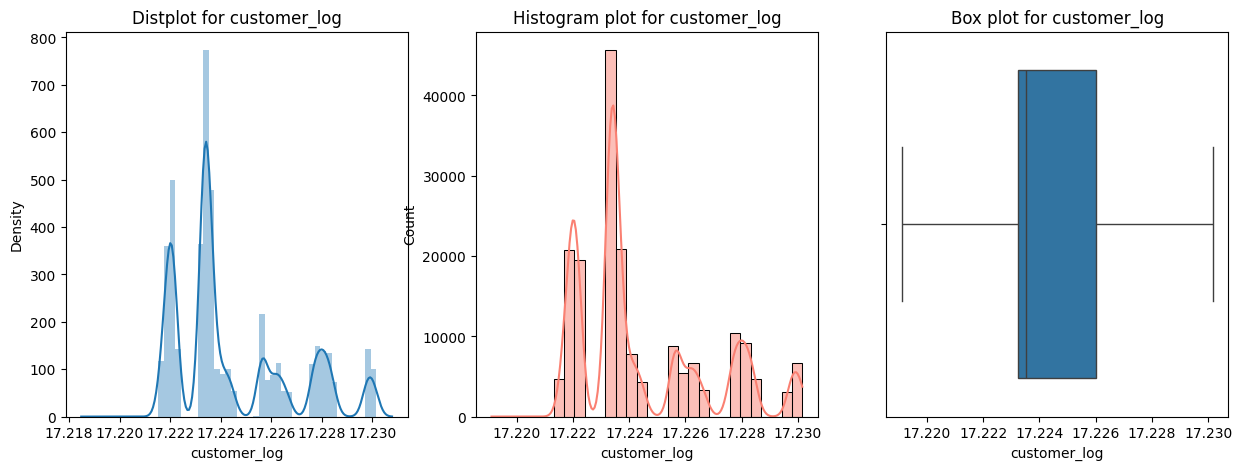

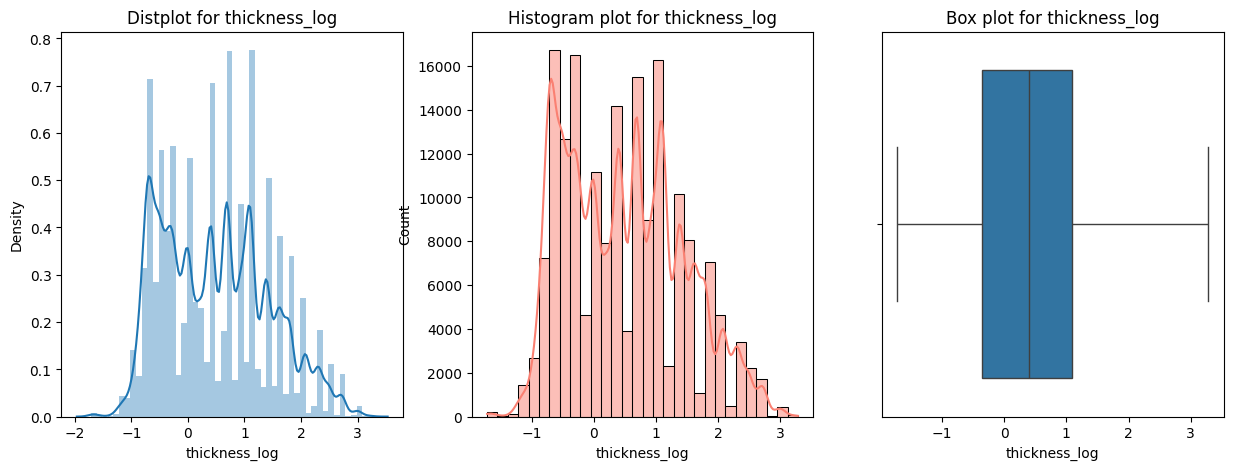

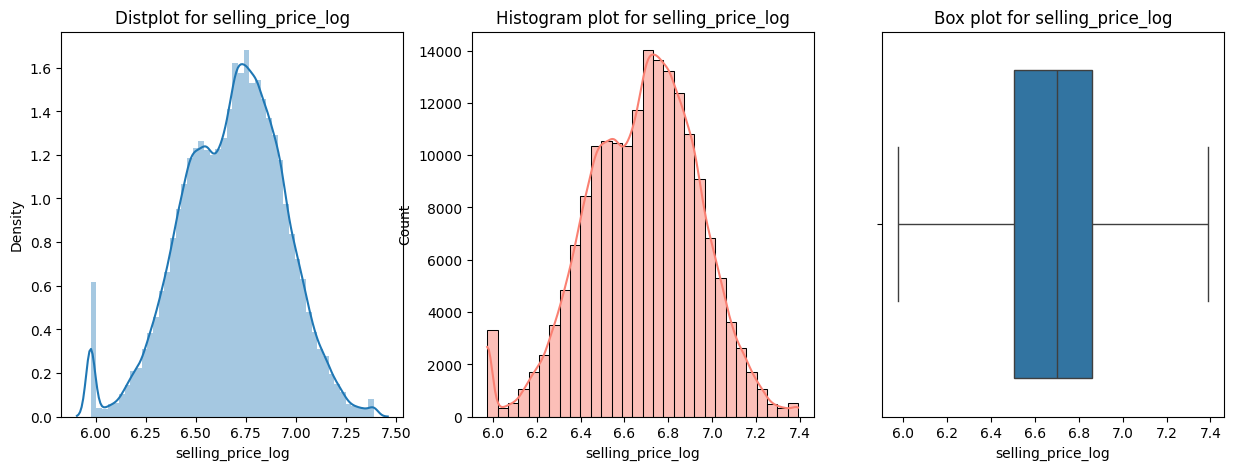

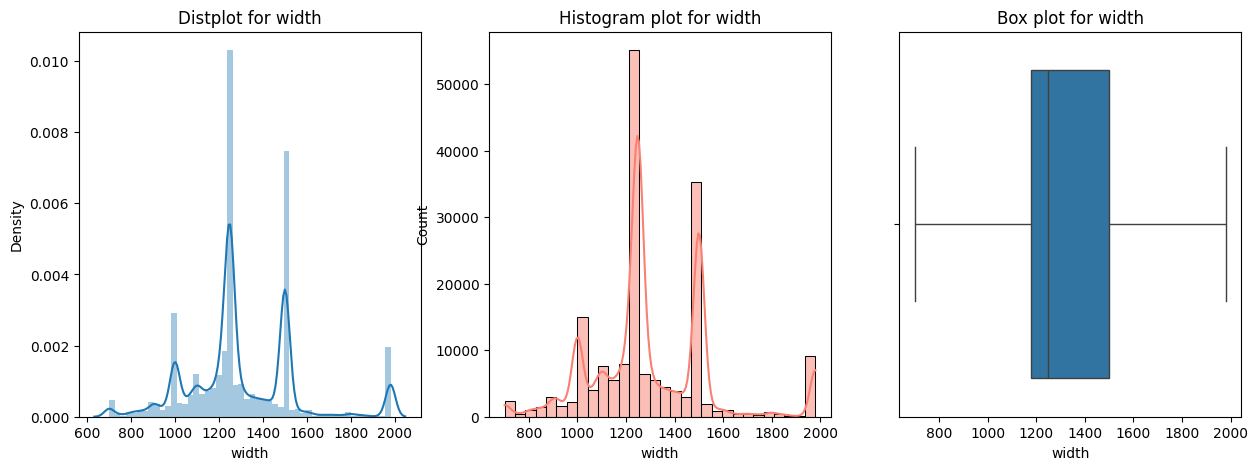

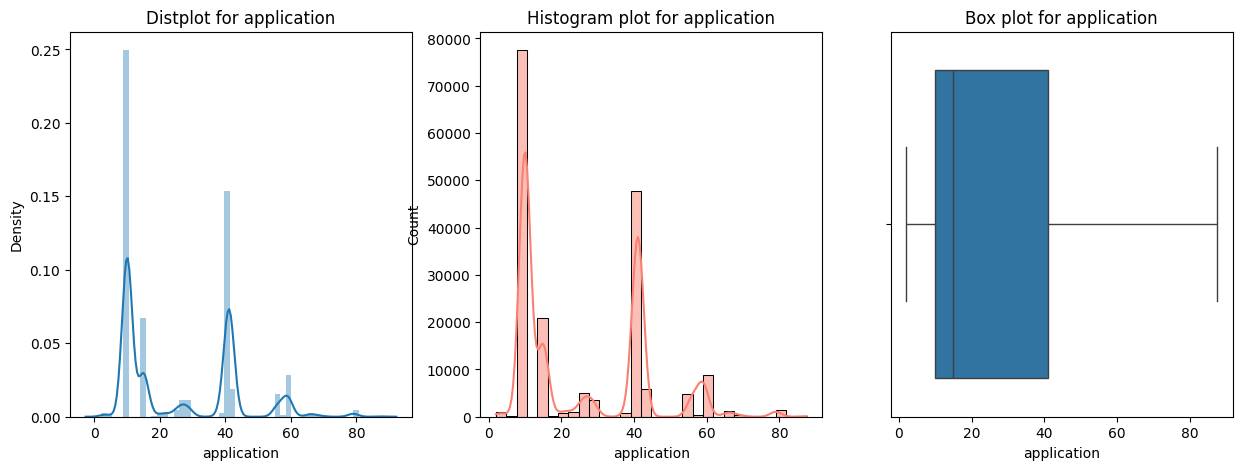

In [51]:
for i in outlier_columns:
    plot(df3,i)

In [52]:
# Dropping the unwanted skewed columns

df4 = df2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [53]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


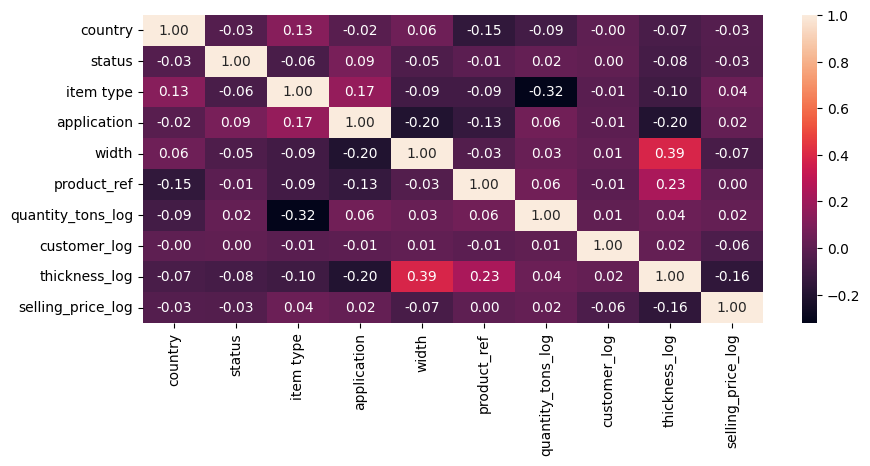

In [54]:
# Checking the correlation with using the heatmap

correlation = df4.drop(columns=["item_date","delivery date","delivery date_1","item_date_1"]).corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation,annot=True,fmt="0.2f")
plt.show()

# Wrong delivery date handling using ML Prediction

In [55]:
df5 = df4.copy()

In [56]:
df5.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [57]:
df5.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [58]:
# Converting the datatype (object to datetime format)

df5["item_date_1"] = pd.to_datetime(df5["item_date_1"])
df5["delivery date_1"] = pd.to_datetime(df5["delivery date_1"])

In [59]:
# identifying the difference of the "delivery date" and "item date"

df5["date_differ"] = (df5["delivery date_1"]-df5["item_date_1"]).dt.days

In [60]:
df5["date_differ"]

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

In [61]:
# some values have a negative values
# it's means the "delivery date" provides, the previous date then the "item date"
# so this is not possible , so we want to predict the "delivary date" for the some datas

In [62]:
# creating the another 3 columns using the "item_date_1"
# it is usefull for the "delivery date" prediction

df5["item_date_day"] = df5["item_date_1"].dt.day
df5["item_date_month"] = df5["item_date_1"].dt.month
df5["item_date_year"] = df5["item_date_1"].dt.year

In [63]:
df5.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


# separating the postive values(pv) dataframe and nagative values(nv) dataframe based on the "date_differ" column


In [64]:
# postive values(pv) dataframe
df5_pv = df5[df5["date_differ"]>=0]
df5_pv.reset_index(drop=True,inplace=True)

In [65]:
df5_pv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
165560,20200702.0,25.0,0,3.0,15.0,2000.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [66]:
# nagative values(nv) dataframe
df5_nv = df5[df5["date_differ"]<0]
df5_nv.reset_index(drop=True,inplace=True)

In [67]:
df5_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [68]:
# now we want to create the model for "delivery date" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [69]:
df5_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

# Find the best algorithm for the "delivery date" predition

In [19]:
def accuracy_date_prediction(df,algorithm):
    x = df.drop(columns=["item_date_1","delivery date_1","date_differ"])
    y = df["date_differ"]

    # train dataset and test dataset spliting
    x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # checking the accuracy score
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    metrics = {"R2_score":r2,
              "mean_squared_error":mse,
              "Root_mean_squared_error":rmse,
              "mean_absolute_error":mae}
    return metrics



In [71]:
print(accuracy_date_prediction(df5_pv,DecisionTreeRegressor))
print(accuracy_date_prediction(df5_pv,RandomForestRegressor))
print(accuracy_date_prediction(df5_pv,ExtraTreesRegressor))
print(accuracy_date_prediction(df5_pv,GradientBoostingRegressor))
print(accuracy_date_prediction(df5_pv,AdaBoostRegressor))
print(accuracy_date_prediction(df5_pv,XGBRegressor))

{'R2_score': 0.9972674921065028, 'mean_squared_error': 4.2394527828949355, 'Root_mean_squared_error': 2.058993147850409, 'mean_absolute_error': 0.015552804034669163}
{'R2_score': 0.9972367872013799, 'mean_squared_error': 4.287091069972518, 'Root_mean_squared_error': 2.0705291763152043, 'mean_absolute_error': 0.01626007912300305}
{'R2_score': 0.9991773484360345, 'mean_squared_error': 1.2763339020928337, 'Root_mean_squared_error': 1.1297494864317636, 'mean_absolute_error': 0.01656056533687678}
{'R2_score': 0.9880340769401778, 'mean_squared_error': 18.564984180501284, 'Root_mean_squared_error': 4.308710268804493, 'mean_absolute_error': 2.947536910030939}
{'R2_score': 0.7530074758608478, 'mean_squared_error': 383.2058989867462, 'Root_mean_squared_error': 19.5756455573436, 'mean_absolute_error': 16.038882435993344}
{'R2_score': 0.9990268349647522, 'mean_squared_error': 1.5098560346641128, 'Root_mean_squared_error': 1.228761992683739, 'mean_absolute_error': 0.19897437494128226}


# Random Forest algorithm is low bias and reduce overfitting compared to others

In [72]:
# Model for the Random Forest

def RandomForest(train_df,test_df):

    x = train_df.drop(columns = ["item_date_1","delivery date_1","date_differ"])
    y = train_df["date_differ"]

    # train dataset and test dataset splitting
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    model = RandomForestRegressor().fit(x_train,y_train)

    data = test_df.drop(columns =["item_date_1","delivery date_1","date_differ"])

    y_pred = model.predict(data)

    return y_pred


In [73]:
date_difference = RandomForest(df5_pv,df5_nv)

In [74]:
date_difference

array([17.74, 17.7 ,  0.  , ..., 30.  , 30.  , 30.  ])

In [75]:
# changing the "date_differ" datatype float into int

date_difference_1 = []
for i in date_difference:
    data_int = int(round(i,0))
    date_difference_1.append(data_int)

In [76]:
df5_nv["date_differ"] = pd.DataFrame(date_difference_1)

In [77]:
# find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
    date = item_date + pd.to_timedelta(date_differ,unit = "D")
    return date

In [78]:
df5_nv["delivery date_1"] = find_delivery_date(df5_nv["item_date_1"],df5_nv["date_differ"])


In [79]:
# Concadinating the two dataframes(df5_pv,df5_nv) based on the rows

df_final = pd.concat([df5_pv,df5_nv],axis=0,ignore_index=True)

In [80]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [81]:
# Now we create the three new columns using the "delivery_date_1"

df_final["delivery date_day"] = df_final["delivery date_1"].dt.day
df_final["delivery date_month"] = df_final["delivery date_1"].dt.month
df_final["delivery date_year"] = df_final["delivery date_1"].dt.year

In [82]:
df_final.head(3)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,0.405465,6.890609,0,1,4,2021,1,4,2021


In [83]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [84]:
# Droping the unwanted columns

df_final.drop(columns=["item_date","delivery date","item_date_1","delivery date_1","date_differ"],inplace=True)


In [85]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [89]:
# Dataframe converted to csv file
df_final.to_csv("Industrial_Copper_Proper_Data.csv",index=False)

In [2]:
df_final_1 = pd.read_csv(r"C:\Users\madhe\OneDrive\Desktop\Industrial Copper Modeling\Industrial_Copper_Proper_Data.csv")


In [3]:
df_final_1.head()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,2.890372,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


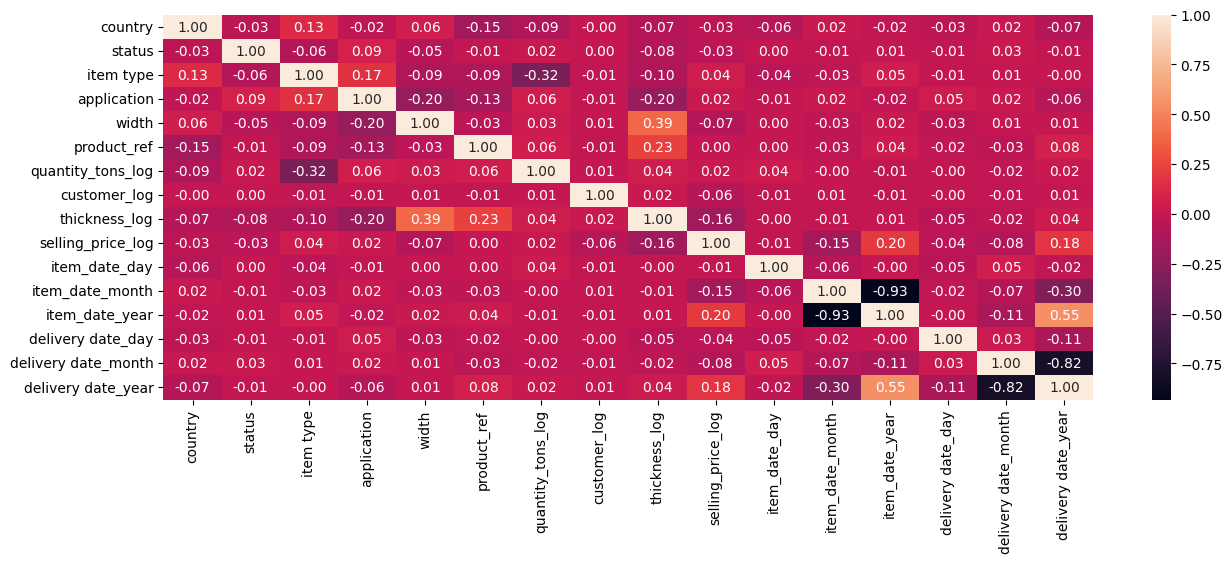

In [99]:
correlation = df_final_1.corr()
plt.figure(figsize=(15,5))
sns.heatmap(correlation,annot=True,fmt="0.2f")
plt.show()

## Classification Method - Predict (Won/Lose)

In [40]:
# import Packages

import numpy as np
import concurrent.futures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [5]:
df_class = df_final_1.copy()

In [11]:
# filter the status column only want to be a (Won & Loss)

df_class_1 = df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]


In [12]:
df_class_1.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [13]:
df_class_1["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [ ]:
# This is a imbalanced data
# so we want to resampling the data by using the "SMOTETomek"

In [14]:
df_class_1.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [15]:
# Features and Target set
x = df_class_1.drop(columns=["status"],axis=1)
y = df_class_1["status"]

In [16]:
x.shape,y.shape

((150450, 15), (150450,))

In [17]:
x_new,y_new = SMOTETomek().fit_resample(x,y)

In [18]:
x_new.shape,y_new.shape

((230130, 15), (230130,))

In [19]:
y_new.value_counts()


status
1    115065
0    115065
Name: count, dtype: int64

In [ ]:
# now the data is balanced
# so we continue the ML Predition

In [20]:
# Find the best algorithm for the classification prediction

def accuracy_checking(x_data,y_data,algorithm):
    # train test splitting
    x_train, x_test ,y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train,y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # checking the accuracy score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)

    metrics =  {"Algorithm": algorithm.__name__,
                "Accuracy_Train":accuracy_train,
                "Accuracy_Test":accuracy_test}
    return metrics

In [21]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9516450648055832}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9704885343968096}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9748753738783649}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8145729478231971, 'Accuracy_Test': 0.8125623130608175}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.836748089066135, 'Accuracy_Test': 0.8344632768361582}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9469175805915586, 'Accuracy_Test': 0.9324692588899967}


In [22]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9637596141311433}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9825967931169339}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9849650197714336}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7757571807239386, 'Accuracy_Test': 0.7783426758788511}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8204601746838743, 'Accuracy_Test': 0.8214270195107113}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9537978533872159, 'Accuracy_Test': 0.9478338330508843}


In [ ]:
# we got good accuracy after oversampling
# ExtratreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy in overfitting.
# so we want the reduce the overfitting
# RandomForestClassifier is good interpretability , so i select the algorithm.

In [23]:

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

# Parameters for GridSearchCV
parameters = {
    "max_depth": [20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": [None]
}

# Define the GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)

# Function to perform fitting in a thread
def fit_model():
    gridsearch.fit(x_train, y_train)
    return gridsearch

# Using ThreadPoolExecutor to run the fitting process in a separate thread
with concurrent.futures.ThreadPoolExecutor() as executor:
    future = executor.submit(fit_model)
    best_model = future.result()


In [24]:
print(f"Best Score: {best_model.best_score_}")


Best Score: 0.9680452432050819


In [25]:
print(f"Best Parameters: {best_model.best_params_}")


Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# passing the best Hypertuning parameters


In [28]:
# RandomForest algorithm and check the accuracy for training and testing
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# checking the accuracy score for train and test
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

print("Accuracy score for Train and Test")
print("------------------------------------")
print("Accuracy_Train: ",accuracy_train )
print("Accuracy_Test: ",accuracy_test)
print(" ")

# confution matrics and the classification report for test
print("Confusion_Matrix for Test")
print("---------------------------")
print(confusion_matrix(y_true=y_test,y_pred=y_pred_test))
print(" ")
print("Classification Report for Test")
print("--------------------------------")
print(classification_report(y_true=y_test,y_pred=y_pred_test))

Accuracy score for Train and Test
------------------------------------
Accuracy_Train:  0.9867085994872463
Accuracy_Test:  0.9701255811932386
 
Confusion_Matrix for Test
---------------------------
[[22728   329]
 [ 1046 21923]]
 
Classification Report for Test
--------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23057
           1       0.99      0.95      0.97     22969

    accuracy                           0.97     46026
   macro avg       0.97      0.97      0.97     46026
weighted avg       0.97      0.97      0.97     46026



In [ ]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [47]:
# Receiver Operating Characteristic(ROC)Curve and Area Under the Curve(AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("Auc_Curve: ",auc_curve)

[inf  1.  0.]
[0.         0.01426899 1.        ]
[0.         0.95446036 1.        ]
 
Auc_Curve:  0.970095687028801


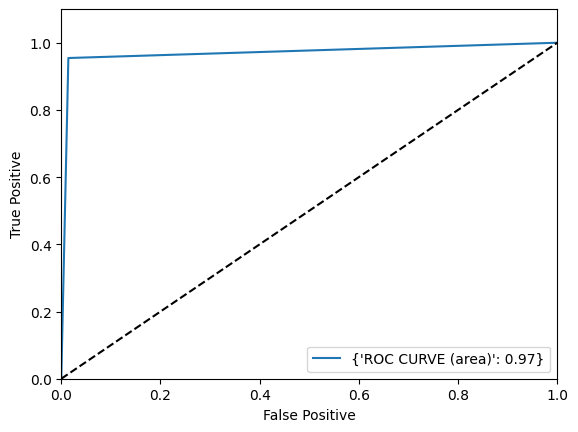

In [63]:
# create a plot for "roc" and "auc" curve

roc_point = {"ROC CURVE (area)":round(auc_curve,2)}
plt.plot(FP,TP,label = roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc = "lower right")
plt.show()


In [111]:
user_data = np.array([[30, 35, 8, 48, 252, 4337787, 5.3, -0.33, 7.46, 3,5,2021,1,1,2021]])
y_pred_user = model.predict(user_data)
if y_pred_user ==1:
    print("Won")
else:
    print("Lose")    

Won


In [83]:
# saving the model using the pickle

with open("Classification_model.pkl", "wb") as f:
    pickle.dump(model,f)

In [134]:
with open("Classification_model.pkl","rb") as f1:
    class_model = pickle.load(f1)

In [112]:
user_data1 = np.array([[92,1.0,5.0,6500.0,765465,2.677355,15.577446,0.3,6.11454,6,7,2021,4,3,2021]])
y_pred_user1 = class_model.predict(user_data1)

if y_pred_user1 == 1:
    print("Won")
else:
    print("Lose")    

Lose


### Regression Method - Predict the Selling Price

In [127]:
# import packages

import concurrent.futures
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [114]:
df_reg = df_final_1.copy()

In [115]:
df_reg.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [116]:
# Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):
    # Features and Target set
    x = df.drop(columns = ["selling_price_log"],axis= 1)
    y = df["selling_price_log"]

    # train set and test set splitting
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train,y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    r2_score_train = r2_score(y_train,y_pred_train)
    r2_score_test = r2_score(y_test,y_pred_test)

    metrics = {"Algorithm":algorithm.__name__,
               "R2_Score_Train":r2_score_train,
               "R2_Score_Test":r2_score_test}
    
    return metrics

In [117]:
print(accuracy_regressor(df_reg, DecisionTreeRegressor))
print(accuracy_regressor(df_reg, RandomForestRegressor))
print(accuracy_regressor(df_reg, ExtraTreesRegressor))
print(accuracy_regressor(df_reg, AdaBoostRegressor))
print(accuracy_regressor(df_reg, GradientBoostingRegressor))
print(accuracy_regressor(df_reg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Score_Train': 1.0, 'R2_Score_Test': 0.9689471535621308}
{'Algorithm': 'RandomForestRegressor', 'R2_Score_Train': 0.9974289318082838, 'R2_Score_Test': 0.9765574562008099}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Score_Train': 1.0, 'R2_Score_Test': 0.9690711244005571}
{'Algorithm': 'AdaBoostRegressor', 'R2_Score_Train': 0.09993041741375153, 'R2_Score_Test': 0.09819044656245635}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Score_Train': 0.9698495569178769, 'R2_Score_Test': 0.9526335977612275}
{'Algorithm': 'XGBRegressor', 'R2_Score_Train': 0.9857651812087751, 'R2_Score_Test': 0.9724387475528383}


In [ ]:
# RandomForestRegressor and ExtraTreesRegressor both have good testing accuracy, but training accuracy is overfitting.
# RandomForestRegressor is good interpretability, so i select the algorithm

In [120]:
# Handling Overfitting in train model 

# Features and Target set
x = df_reg.drop(columns=["selling_price_log"], axis= 1)
y = df_reg["selling_price_log"]

# Train set and Test set Splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Parameters for GridSearchCV
parameters = {
    "max_depth": [20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": [None]
}

# Define the GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=5, n_jobs=-1)

# Function to perform fitting in a thread
def fit_model_1():
    gridsearch.fit(x_train, y_train)
    return gridsearch

# Using ThreadPoolExecutor to run the fitting process in a separate thread
with concurrent.futures.ThreadPoolExecutor() as executor:
    future = executor.submit(fit_model_1)
    best_model_reg = future.result()


In [121]:
print(f"Best Score: {best_model_reg.best_score_}")


Best Score: 0.9813417293595512


In [122]:
print(f"Best Parameters: {best_model_reg.best_params_}")


Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [123]:
# passing the parameters and check the accuracy for both training and testing 

# Features and Target set
x = df_reg.drop(columns=["selling_price_log"], axis= 1)
y = df_reg["selling_price_log"]

# training data and test data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_reg = RandomForestRegressor(max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)

y_pred_train = model_reg.predict(x_train)
y_pred_test = model_reg.predict(x_test)

r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

print(r2_score_train)
print(r2_score_test)

0.9960757841720114
0.9765604575662086


In [124]:
# predict the selling price with Hypertuning parameters and calculate the accuracy using metrics

# Features and Target set
x = df_reg.drop(columns=["selling_price_log"], axis= 1)
y = df_reg["selling_price_log"]

# training data and test data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_reg = RandomForestRegressor(max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)
y_pred = model_reg.predict(x_test)

r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

metrics_reg = {"R2_Score": r2_score,
               "Mean_Squared_Error": mse,
               "Root_Mean_Squared_Error":rmse,
               "Mean_Absolute_Error":mae}
print(metrics_reg)

{'R2_Score': 0.9766302975548647, 'Mean_Squared_Error': 0.007738498689657543, 'Root_Mean_Squared_Error': 0.08796873700160497, 'Mean_Absolute_Error': 0.03581537692250726}


In [126]:
user_data_reg = np.array([[3529092,4,64,24,3214,36346633,0.3,2,56,-8.5,89845,352,6,3,73]])
y_pred = model_reg.predict(user_data_reg)

print("Predicted Selling Price With Log: ",y_pred[0])
print("Predicted Selling Price Without Log: ",np.exp(y_pred[0]))

Predicted Selling Price With Log:  6.4631799698285715
Predicted Selling Price Without Log:  641.0964860349795


In [128]:
# Save the model in pickle formet

with open("Regression_Model.pkl","wb") as r:
    pickle.dump(model_reg, r)


In [129]:
with open("Regression_Model.pkl","rb") as r1:
    reg_model = pickle.load(r1)